In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from LogisticRegression import LogisticRegression

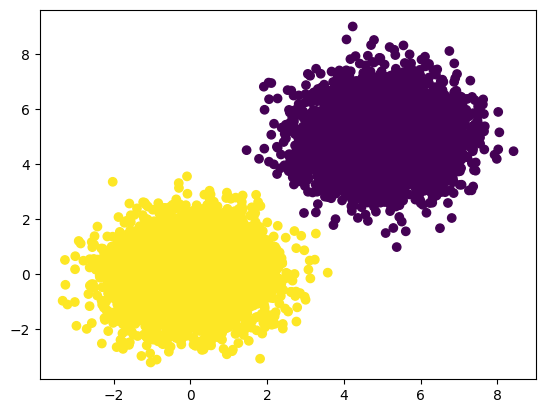

In [31]:
X = np.random.randn(10000,2)
y = np.ones(10000) 

y[:5000] *= -1
X[:5000] += 5

df = pd.DataFrame(X, columns=['x1', 'x2'])
df['y'] = y

plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

Final weights:  [-1.6451834  -1.55437618]
Final bias:  7.536686235369216
Final loss:  0.004111272844411635


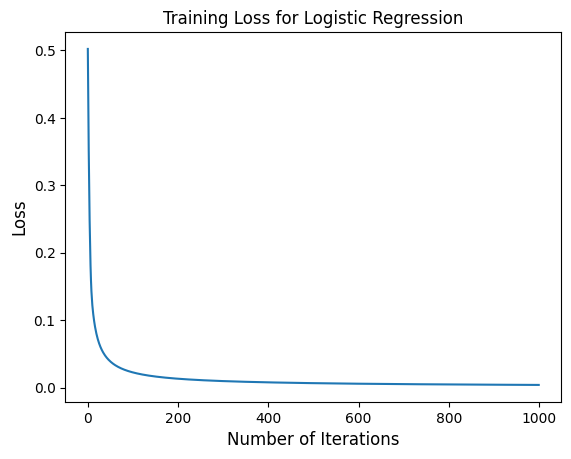

In [32]:
model = LogisticRegression(alpha=1e-4, max_iter=1000)
w,b,loss = model.fit(X, y)

print("Final weights: ", w)
print("Final bias: ", b)
print("Final loss: ", loss[-1])

plt.figure()
plt.title("Training Loss for Logistic Regression")
plt.xlabel("Number of Iterations", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.plot(loss)
plt.show()

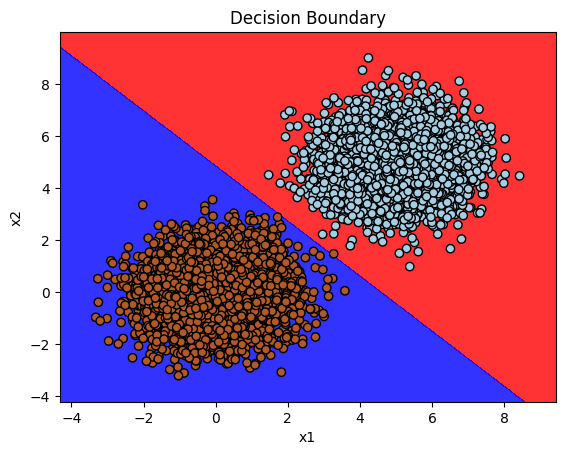

In [33]:
# Create a mesh grid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Calculate the decision boundary
Z = w[0] * xx + w[1] * yy + b
Z = np.sign(Z)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.8, levels=[-1, 0, 1], colors=['red', 'blue'], linestyles=['--'])
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.Paired)
plt.title("Decision Boundary")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [34]:
preds = model.predict(X)
preds = np.where(preds > 0.5, 1, -1)
missclassified = np.where(preds != y)[0]
missclassified_points = X[missclassified]

missclassified_points

array([[3.27179997, 1.47241252]])

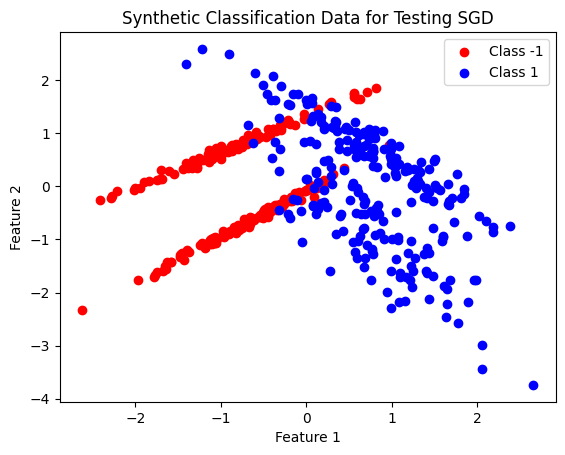

In [35]:
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler

X, y = make_classification(n_samples=500, n_features=2, n_classes=2, 
                           n_informative=2, n_redundant=0, random_state=42)

y = 2 * y - 1  

scaler = StandardScaler()
X = scaler.fit_transform(X)

plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='red', label='Class -1')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.title("Synthetic Classification Data for Testing SGD")
plt.show()


Final weights (SGD):  [3.79517302 0.10927104]
Final bias (SGD):  -0.15747112449889203
Final loss (SGD):  0.2845015367688185


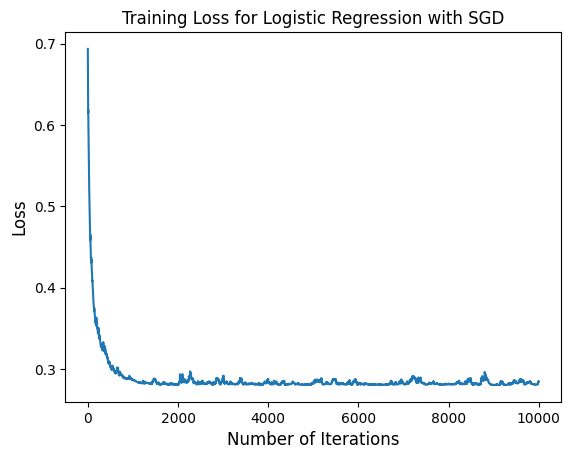

In [36]:
model_sgd = LogisticRegression(alpha=.047, max_iter=10000, SGD=True)

w_sgd, b_sgd, loss_sgd = model_sgd.fit(X, y)

print("Final weights (SGD): ", w_sgd)
print("Final bias (SGD): ", b_sgd)
print("Final loss (SGD): ", loss_sgd[-1])

plt.figure()
plt.title("Training Loss for Logistic Regression with SGD")
plt.xlabel("Number of Iterations", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.plot(loss_sgd)
plt.show()

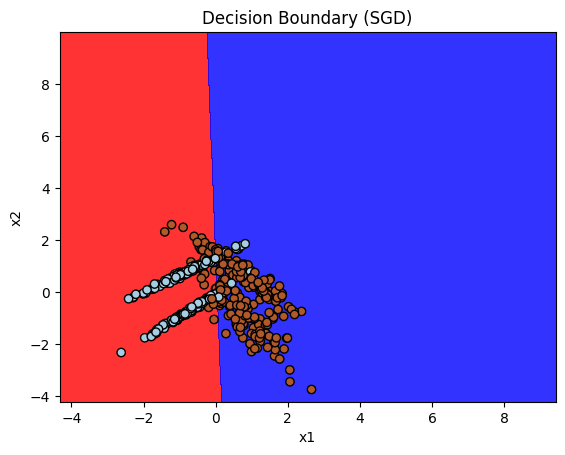

In [37]:
Z_sgd = w_sgd[0] * xx + w_sgd[1] * yy + b_sgd
Z_sgd = np.sign(Z_sgd)

plt.contourf(xx, yy, Z_sgd, alpha=0.8, levels=[-1, 0, 1], colors=['red', 'blue'], linestyles=['--'])
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.Paired)
plt.title("Decision Boundary (SGD)")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [38]:
X, y = make_classification(
    n_samples=1000,         # 1000 samples
    n_features=4,           # 4 features total
    n_informative=3,        # 3 features are informative
    n_redundant=0,          # No redundant features
    n_classes=2,           # Binary classification
    n_clusters_per_class=2, # 2 clusters per class
    flip_y=0.05,           # 5% label noise for realism
    class_sep=1.5,         # Moderate class separation
    random_state=42        # Reproducibility
)

df = pd.DataFrame(X)
df['y'] = y

df.head()

,0,1,2,3,y
0,1.999221,0.504205,0.198680,1.488123,1
1,-0.861007,1.899681,-0.945746,-1.708712,0
2,2.222067,1.295623,-2.105647,-0.174257,1
3,-2.979343,-0.202986,0.194052,1.018522,0
4,2.042986,1.748094,-0.816217,-1.296030,1


In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
lr = LogisticRegression(alpha=1e-9, max_iter=1000)

lr.fit(X_train, y_train)

preds = lr.predict(X_test)

preds = np.where(preds >= .5, 1, 0)

print(f'Accuracy: {np.mean(preds == y_test)}')

res_df = pd.DataFrame(X_test)
res_df['y'] = y_test
res_df['preds'] = preds

res_df.head()

Accuracy: 0.81


,0,1,2,3,y,preds
0,-1.726132,-2.079892,0.820158,-1.296796,0,0
1,1.831037,1.032668,0.458168,-0.282810,1,1
2,1.904055,2.175899,1.628469,-0.646236,1,1
3,1.545586,-0.453018,2.015275,1.344350,1,1
4,0.106398,1.276380,0.757495,-1.771569,0,1


In [41]:
from sklearn.linear_model import LogisticRegression

lr2 = LogisticRegression(C=.5, max_iter=1000, penalty='l1', solver='liblinear')

lr2.fit(X_train,y_train)

preds = lr2.predict(X_test)

print(f'Accuracy: {np.mean(preds == y_test)}')

res_df = pd.DataFrame(X_test)
res_df['y'] = y_test
res_df['preds'] = preds

res_df.head()

Accuracy: 0.975


,0,1,2,3,y,preds
0,-1.726132,-2.079892,0.820158,-1.296796,0,0
1,1.831037,1.032668,0.458168,-0.282810,1,1
2,1.904055,2.175899,1.628469,-0.646236,1,1
3,1.545586,-0.453018,2.015275,1.344350,1,1
4,0.106398,1.276380,0.757495,-1.771569,0,0
